 
This is done by Team Aztec for the Energy Hackathon 6.0 targeting Demand Side 
Management.This code predicts the daily load using Feed Forward Neural Networks. 
 

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from pandas import read_csv
import pandas as pd
import math


In [114]:
path  = "/content/drive/MyDrive/data.csv"
df = read_csv(path)

The dataset contains the daily energy consumption of panama city , with variables such as whether it is holiday or not along with the temperature and humidity.

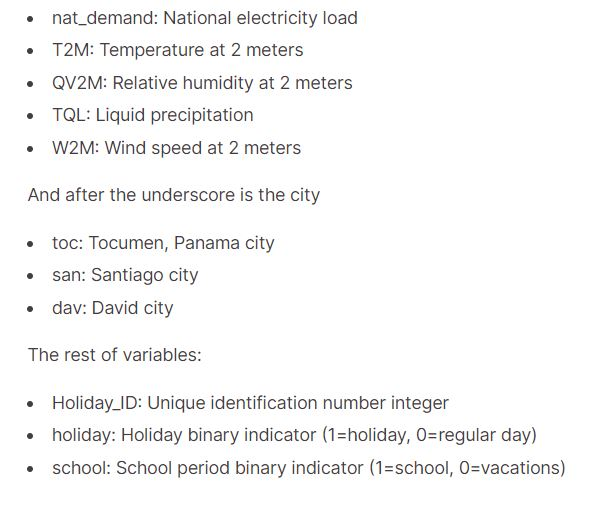

In [115]:
print(df.columns)

Index(['datetime', 'nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
       'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav',
       'TQL_dav', 'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')


In [116]:
df['Date Time'] = pd.to_datetime(df['datetime'])
df['Day'] = df['Date Time'].dt.day
df['Month'] = df['Date Time'].dt.month
df['Year'] = df['Date Time'].dt.year
df['Hour'] = df['Date Time'].dt.hour
df['Minute'] = df['Date Time'].dt.minute

df['Demand'] = pd.to_numeric(df['nat_demand'], errors = 'coerce')
df['Temperature'] = pd.to_numeric(df['T2M_san'], errors = 'coerce')
df['Humidity'] = pd.to_numeric(df['QV2M_san'], errors = 'coerce')
df['Precipitation'] = pd.to_numeric(df['TQL_san'], errors = 'coerce')
df['Holiday'] = pd.to_numeric(df['holiday'], errors = 'coerce')


df.drop(['datetime'], axis = 1, inplace = True)
df.drop(['nat_demand'], axis = 1, inplace = True)
df.drop(['T2M_toc'], axis = 1, inplace = True)
df.drop(['QV2M_toc'], axis = 1, inplace = True)
df.drop(['TQL_toc'], axis = 1, inplace = True)
df.drop(['W2M_toc'], axis = 1, inplace = True)
df.drop(['T2M_san'], axis = 1, inplace = True)
df.drop(['QV2M_san'], axis = 1, inplace = True)
df.drop(['TQL_san'], axis = 1, inplace = True)
df.drop(['W2M_san'], axis = 1, inplace = True)
df.drop(['T2M_dav'], axis = 1, inplace = True)
df.drop(['QV2M_dav'], axis = 1, inplace = True)
df.drop(['TQL_dav'], axis = 1, inplace = True)
df.drop(['W2M_dav'], axis = 1, inplace = True)
df.drop(['Holiday_ID'], axis = 1, inplace = True)
df.drop(['holiday'], axis = 1, inplace = True)
df.drop(['school'], axis = 1, inplace = True)

print(df.head())
 

            Date Time  Day  Month  Year  Hour  Minute    Demand  Temperature  \
0 2015-01-03 01:00:00    3      1  2015     1       0  970.3450    23.482446   
1 2015-01-03 02:00:00    3      1  2015     2       0  912.1755    23.399255   
2 2015-01-03 03:00:00    3      1  2015     3       0  900.2688    23.343530   
3 2015-01-03 04:00:00    3      1  2015     4       0  889.9538    23.238794   
4 2015-01-03 05:00:00    3      1  2015     5       0  893.6865    23.075403   

   Humidity  Precipitation  Holiday  
0  0.017272       0.001855        0  
1  0.017265       0.001327        0  
2  0.017211       0.001428        0  
3  0.017128       0.002599        0  
4  0.017059       0.001729        0  


In [117]:
print(df.shape)

(48048, 11)


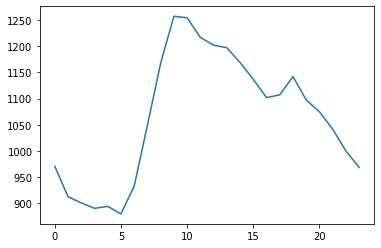

In [118]:
temp = df['Demand'][:24]
temp.plot()

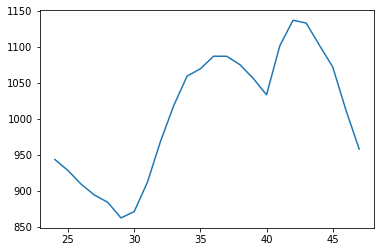

In [119]:
temp1 = df['Demand'][24:48]
temp1.plot()

In [120]:
features = list(df)[6:]
print(features)

['Demand', 'Temperature', 'Humidity', 'Precipitation', 'Holiday']


In [121]:
df_for_training = df[features].astype(float)

In [122]:
print(df_for_training.describe())

             Demand   Temperature      Humidity  Precipitation       Holiday
count  48048.000000  48048.000000  48048.000000   48048.000000  48048.000000
mean    1182.868647     26.921023      0.017844       0.106265      0.062937
std      192.068896      3.018129      0.001889       0.086293      0.242852
min       85.192500     19.765222      0.010247       0.000009      0.000000
25%     1020.056900     24.769281      0.016584       0.036819      0.000000
50%     1168.427700     26.167352      0.018351       0.085968      0.000000
75%     1327.563950     28.712335      0.019242       0.157288      0.000000
max     1754.882000     39.063440      0.022165       0.484985      1.000000


In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [124]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [125]:
print(df_for_training_scaled)

[[0.53013    0.19262007 0.58943876 0.00380735 0.        ]
 [0.49529149 0.18830926 0.58885032 0.00271795 0.        ]
 [0.4881604  0.18542169 0.58437987 0.00292639 0.        ]
 ...
 [0.59674299 0.29162318 0.77788415 0.2979987  0.        ]
 [0.57281998 0.28463195 0.76829044 0.22280226 0.        ]
 [0.55601703 0.27775142 0.7580556  0.20656738 0.        ]]


In [126]:
trainX = []
trainY = []

In [127]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 168

In [128]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (47880, 168, 5).
trainY shape == (47880, 1).


In [129]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import  Dropout

In [130]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 168, 64)           17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [131]:
#history = model.fit(trainX, trainY, validation_split = 0.2, epochs = 100,  batch_size = 100)

In [132]:
# plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.legend()

In [133]:
# model.save("first_Model.h5")

In [134]:
# model.save("/content/drive/MyDrive/first_Model.h5")

In [135]:
from tensorflow.keras.models import load_model
new_model = load_model('/content/drive/MyDrive/first_Model.h5')

In [136]:
print(trainX.shape)

(47880, 168, 5)


1/1 [==============================] - 0s 30ms/step


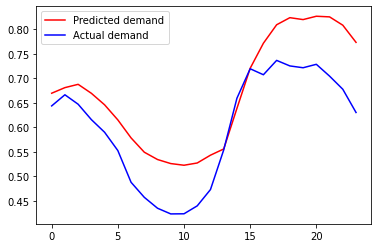

In [152]:
#Enter past 168 data i.e past 7 days data
#The data should be numpy array [1,168,5]
data = 400
past_data = trainX[data]
#enter todays 'Temperature', 'Humidity', 'Precipitation', 'Holiday'
temperature = trainX[data+1][0][1]
humidity = trainX[data+1][0][2]
precipitation = trainX[data+1][0][3]
holiday = trainX[data+1][0][4]

past_data = np.expand_dims(past_data, axis=0)


todays_demand_list = []
for i in range(0,24):
  prediction = new_model.predict(past_data)
  todays_demand_list.append(prediction[0][0])
  past_data = np.delete(past_data[0],0,0)
  temp_list = past_data.tolist()
  temp_list.append([prediction[0][0],temperature,humidity,precipitation,holiday])
  past_data = np.array(temp_list)
  past_data = np.expand_dims(past_data, axis=0)

actual_demand_list = []
for i in range(0,24):
  actual_demand_list.append(trainX[data+1][i][0])

plt.plot(range(0,24),todays_demand_list,'r',label = "Predicted demand")
plt.plot(range(0,24),actual_demand_list,'b',label = "Actual demand")
plt.legend(loc="upper left")

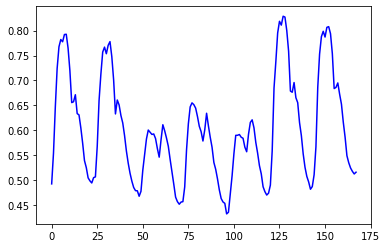

In [138]:
days = []
for i in range(0,168):
  days.append(trainX[data+1][i][0])
plt.plot(range(0,168),days,'b',label = "Actual demand")



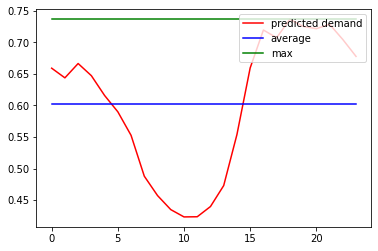

In [149]:
x = 400
next_days = []
for i in range(0,24):
  next_days.append(trainX[x][i][0])


pavg_list = []
pratio_list = []
temp = 0
for i in next_days:
  temp += i

pavg = temp/24.
pmax = max(next_days)
for i in range (0,24):
  pavg_list.append(pavg)
  pratio_list.append(pmax)

plt.plot(range(0,24),next_days,'r',label = "predicted demand")
plt.plot(range(0,24),pavg_list,'b',label = "average")
plt.plot(range(0,24),pratio_list,'g',label = "max")

plt.legend(loc="upper right")

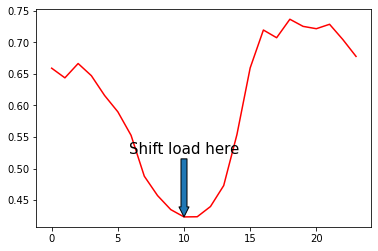

In [150]:
pmin = min(next_days)
ind = next_days.index(pmin)
len_arrow = 0.1
 
plt.annotate('Shift load here',xy=(ind,pmin),xytext=(ind,pmin + len_arrow),
             arrowprops={"width":6,"headwidth":10,'headlength':10},
             horizontalalignment='center',fontsize=15)




plt.plot(range(0,24),next_days,'r',label = "predicted demand")

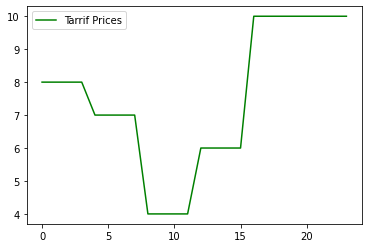

In [151]:
price_min = 4
price_max = 10
pdiff = pmax - pmin
ratio = (price_max - price_min)/pdiff
price_list = []
for i in next_days:
  temp = i * ratio
  price_list.append(temp)

for i in range(1,len(price_list)):
  if abs(price_list[i]-price_list[i-1]) < 1 :
    price_list[i] = price_list[i-1]


temp_max = max(price_list)
temp_diff = price_max - temp_max
for i in range(0,len(price_list)):
  price_list[i] = price_list[i] + temp_diff


for i in range(0,4):
  temp_avg = int((price_list[4*i]+price_list[4*i+1]+price_list[4*i+2]+price_list[4*i+3])/4)
  price_list[4*i] = temp_avg
  price_list[4*i+1] = temp_avg
  price_list[4*i+2] = temp_avg
  price_list[4*i+3] = temp_avg

plt.plot(range(0,24),price_list,'g',label = "Tarrif Prices")
plt.legend(loc="upper left")
  